<a href="https://colab.research.google.com/github/rushithkaru/IndoorLocalisation/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import pyplot as plt
import os
import pandas as pd
import math

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 45 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
sift = cv2.SIFT_create()

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CV final assignment/train'
array_images_names = os.listdir(path)[0:100]
#grab the array of images
#array_images = [cv2.imread(os.path.join(path, x),cv2.IMREAD_COLOR) for x in array_images_names]
array_images = [
                
                cv2.resize(cv2.imread(os.path.join(path, x),cv2.IMREAD_COLOR), (340,245)) for x in array_images_names]


In [ ]:
path = '/content/drive/MyDrive/CV final assignment/test'
array_images_names_test = os.listdir(path)
#grab the array of images
array_images_test = [
                     cv2.resize(cv2.imread(os.path.join(path, x),cv2.IMREAD_COLOR), (100,100)) for x in array_images_names_test]

In [ ]:
array_image_id = [x[:-4] for x in array_images_names]
dict_img = {'images': array_images, 'id':array_image_id}
df = pd.DataFrame(dict_img)
#df = df.drop(labels=55, axis=0)
df

,images,id
0,"[[[45, 90, 111], [45, 90, 111], [45, 90, 111],...",IMG4041_4
1,"[[[80, 123, 126], [80, 123, 126], [79, 122, 12...",IMG4041_5
2,"[[[134, 145, 125], [135, 146, 126], [136, 147,...",IMG4039_1
3,"[[[137, 139, 139], [141, 143, 143], [129, 131,...",IMG4046_2
4,"[[[225, 211, 169], [226, 212, 170], [219, 209,...",IMG4039_5
...,...,...
95,"[[[181, 156, 146], [181, 156, 146], [181, 156,...",IMG4057_5
96,"[[[206, 203, 198], [206, 203, 198], [206, 203,...",IMG4058_1
97,"[[[145, 137, 130], [146, 138, 131], [147, 139,...",IMG4060_4
98,"[[[57, 93, 103], [58, 94, 104], [58, 94, 104],...",IMG4055_5


In [ ]:
array_image_id = [x[:-4] for x in array_images_names_test]
dict_img = {'images': array_images_test, 'id':array_image_id}
df_test = pd.DataFrame(dict_img)
#df = df.drop(labels=55, axis=0)
df_test

,images,id
0,"[[[237, 213, 191], [235, 211, 189], [234, 208,...",IMG4486_2
1,"[[[58, 75, 83], [96, 123, 133], [88, 114, 130]...",IMG4475_4
2,"[[[146, 144, 143], [146, 144, 143], [147, 145,...",IMG4473_1
3,"[[[197, 171, 159], [195, 169, 157], [197, 171,...",IMG4497_1
4,"[[[120, 121, 119], [119, 120, 118], [119, 119,...",IMG4472_2
...,...,...
1195,"[[[59, 95, 105], [60, 96, 106], [57, 96, 105],...",IMG4494_5
1196,"[[[143, 141, 140], [144, 142, 141], [146, 142,...",IMG4491_3
1197,"[[[106, 154, 155], [110, 154, 155], [113, 157,...",IMG4467_4
1198,"[[[58, 63, 63], [52, 57, 56], [43, 50, 56], [4...",IMG4469_4


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive//CV final assignment/train.csv')
df_all = pd.merge(df,df_train, on="id")
df_all['x']

0       3.419322
1       3.419322
2      14.419322
3    -156.680678
4      14.419322
         ...    
95   -122.680678
96     35.119322
97     32.219322
98     14.819322
99     55.719322
Name: x, Length: 100, dtype: float64

In [ ]:
x = df_all['x'].to_numpy()
x.shape

(100,)

In [ ]:
train_test_boudary = math.ceil(0.98*len(df_all))

train = df_all[0:train_test_boudary]
test = df_all[train_test_boudary:]
#train = df_all
#test = df_test

x_train = np.array(train['images'].to_list())
y_train = train[['x', 'y']].to_numpy()
# y_train = np.array(train['x'].to_list())


x_test = np.array(test['images'].to_list())
#test_names = df_test['id']
# y_test = np.array(test['x'].to_list())
y_test = test[['x', 'y']].to_numpy()

In [ ]:
with open('/content/drive/MyDrive/CV final assignment/Example2.txt', 'w') as writefile:
    writefile.write("Test file saving")

[  5.11932192 -68.31728035]


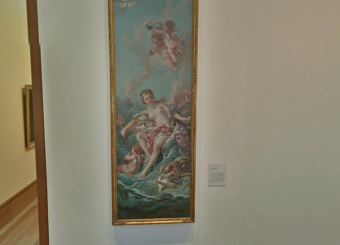

In [ ]:
print(y_train[20])
cv2_imshow(x_test[1])

In [ ]:
def orb_feature_matching(img1, img2, n=10):
    #test1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    #test2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    test1 = img1
    test2 = img2
    #sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    try:
      matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
      matches = matcher.knnMatch(des1, des2, k=2)
    except:
      return [],[]
    good = []
    #print(len(matches))
    for match1, match2 in matches:
        if match1.distance < 0.5 * match2.distance:
            good.append([match1])
            
    
    #img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
    if len(good) > 1:
      result=cv2.drawMatchesKnn(test1,kp1,test2,kp2,good,None,[0,0,255],flags=2)
      #cv2_imshow(result)
      #cv2_imshow(img_matches)
      
      return result, good

    return [],[]

In [ ]:
a,v = orb_feature_matching(x_train[0],x_train[55])


**Main predictions**

In [ ]:
# Feature matching
predictions = []
counter = []
for i in range(len(x_test)):
  for j in range(math.floor(len(x_train))):
    m , d = orb_feature_matching(x_test[i],x_train[j])
    counter.append(len(d))
  max_value = max(counter)
  predictions.append(y_train[counter.index(max_value)])
  #print(counter)
  print(voter(counter))
  counter = []


In [ ]:
#Majority voting prediction (not implemented yet)
def voter(counter):
  top = sorted(range(len(counter)), key=lambda x: counter[x])[-5:]
  #for i in range(len(top)):
  pred = []
  for i in range(len(top)):
    pred.append(y_train[top[i]])
  return pred



In [ ]:
predictions

[array([  3.41932192, -69.11728035]), array([-95.48067808, 107.9827196 ])]

In [ ]:
test_names

0       IMG4486_2
1       IMG4475_4
2       IMG4473_1
3       IMG4497_1
4       IMG4472_2
          ...    
1195    IMG4494_5
1196    IMG4491_3
1197    IMG4467_4
1198    IMG4469_4
1199    IMG4485_3
Name: id, Length: 1200, dtype: object

In [ ]:
import csv
rowlist = [["id","x","y"]]
for i in range(len(predictions)):
    rowlist.append([test_names[i],predictions[i][0],predictions[i][1]])

with open('/content/drive/MyDrive/CV final assignment/pred1.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(rowlist)

"""with open('/content/drive/MyDrive/CV final assignment/Example2.txt', 'w') as writefile:
    writefile.write("Test file saving")"""

'with open(\'/content/drive/MyDrive/CV final assignment/Example2.txt\', \'w\') as writefile:\n    writefile.write("Test file saving")'

In [ ]:
def manhattan_error(predicted,actual):
  N = len(predicted)
  sum = 0
  for i in range(len(actual)):
    sum += abs(actual[i][0] - predicted[i][0]) + abs(actual[i][1] - predicted[i][1])
  
  sum = sum/N

  return sum

In [ ]:
print(manhattan_error(predictions,y_test))

63.60499999610001


**Test code below here**

In [ ]:
match = []
desc = []
counter = []
for i in range(len(x_train)):
    check,feat = orb_feature_matching(x_test[0],x_train[i])
    counter.append(len(feat))
    if len(check)>0 and len(feat) >0:
      match.append(check)
      desc.append(feat)
  
  

In [ ]:
print(len(match))
#print(desc[0])
#print(len(desc[0]))
descrip = []
for i in range(len(desc)):
  #print(i)
  descrip.append(len(desc[i]))
  #print(len(desc[i]))
print(sorted(range(len(descrip)), key=lambda x: descrip[x])[-5:])
top = sorted(range(len(counter)), key=lambda x: counter[x])[-5:]
#cv2_imshow(match[55])
#45 + 28 + 41
#49 + 36 + 41
#45 + 51 + 37
#31 + 31 + 31

0
[]


In [ ]:
cv2_imshow(match[0])
print(len(desc[0]))

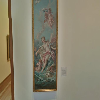

[ 32.21932192 -25.91728035]


In [ ]:
cv2_imshow(x_test[1])
print(y_train[-1])

In [ ]:
len(x_train)

80

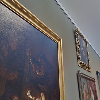

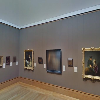

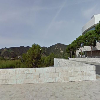

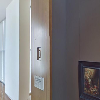

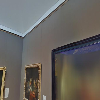

In [ ]:
for i in range(len(top)):
  cv2_imshow(x_train[top[i]])

In [ ]:
for i in range(len(top)):
  print(y_train[top[i]])

[36.81932192  5.98271965]
[ 35.11932192 -21.81728035]
[  3.41932192 -69.11728035]
[34.81932192  4.78271965]
[43.51932192 12.48271965]


In [ ]:
predictions

[array([  3.41932192, -69.11728035]),
 array([ 27.91932192, -76.41728035]),
 array([  3.41932192, -69.11728035]),
 array([-124.4806781,  113.0827196]),
 array([14.81932192, 32.78271965]),
 array([14.81932192, 32.78271965]),
 array([32.71932192,  5.28271965]),
 array([ 35.11932192, -21.81728035]),
 array([36.81932192,  5.98271965]),
 array([-124.4806781,  113.0827196]),
 array([ 1.81932192, 39.48271965]),
 array([-124.4806781,  113.0827196]),
 array([14.81932192, 32.78271965]),
 array([ 35.11932192, -21.81728035]),
 array([-124.4806781,  113.0827196]),
 array([  3.41932192, -69.11728035]),
 array([  3.41932192, -69.11728035]),
 array([14.81932192, 32.78271965]),
 array([34.81932192,  4.78271965])]

In [ ]:
y_train

array([[   3.41932192,  -69.11728035],
       [   3.41932192,  -69.11728035],
       [  14.41932192,   27.88271965],
       [-156.6806781 ,   11.38271965],
       [  14.41932192,   27.88271965],
       [  22.11932192,  -70.61728035],
       [ -95.08067808,   50.98271965],
       [ -11.78067808,   27.48271965],
       [   1.81932192,   39.48271965],
       [   3.41932192,  -69.11728035],
       [  11.71932192,   33.58271965],
       [   1.81932192,   39.48271965],
       [  11.71932192,   33.58271965],
       [  44.51932192,    8.58271965],
       [-111.8806781 ,  120.0827196 ],
       [  44.51932192,    8.58271965],
       [  44.51932192,    8.58271965],
       [-124.4806781 ,  113.0827196 ],
       [  27.91932192,  -76.41728035],
       [  34.81932192,    4.78271965],
       [   5.11932192,  -68.31728035],
       [   5.11932192,  -68.31728035],
       [  18.51932192,   27.28271965],
       [ -85.58067808,  122.6827196 ],
       [ -85.58067808,  122.6827196 ],
       [-124.4806781 ,  1